# Створення базових моделей

**Частина 1**

Необхідно визначити в коді натупне:

1. Базову модель для навчання (виберіть який тип моделі хочете натренувати CNN, MLP тощо).
2. Початкову кількість шарів та їх параметри.
3. Функції для тренування та валідації, візуалізації результатів, фінкцію втрат та метрику перевірки результатів.
4. Натренуйте модель і перевірте результат. Яке значення функції втрат, яка метрика вашої моделі після навчання? Візуалізуйте графіки навчання. Скільки часу потрібно було на тренування?

**Частина 2**

1. Опишіть гіперпараметри моделі: кількість шарів/кількість нейронів в шарах, різні їх комбінації.
2. Підберіть та перевірте найкращі гіперпараметри вашої моделі за яких метрика під час валідації буде найвищою. Скільки часу потрібно було на підбір гіперпараметрів моделі?
3. Продемонструйте на яких класах та зображеннях найчастіше помиляється найкраща модель.
4. Візуалізувати графіки залежностей між гіперпараметрами найкращої моделі і змінами значень її метрики.

In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as transforms

from torch.utils.data import DataLoader

from torchvision.datasets import FashionMNIST

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
datasets_path = './datasets'

In [5]:
train_dataset = FashionMNIST(
    datasets_path,
    train=True,
    download=True,
    transform=transform
)

In [6]:
validation_dataset = FashionMNIST(
    datasets_path,
    train=False,
    transform=transform
)

In [7]:
batch_size = 32

In [8]:
train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)

In [9]:
validation_loader = DataLoader(dataset=validation_dataset, shuffle=False)

In [10]:
plt_size = 2

In [11]:
plt_images = 8

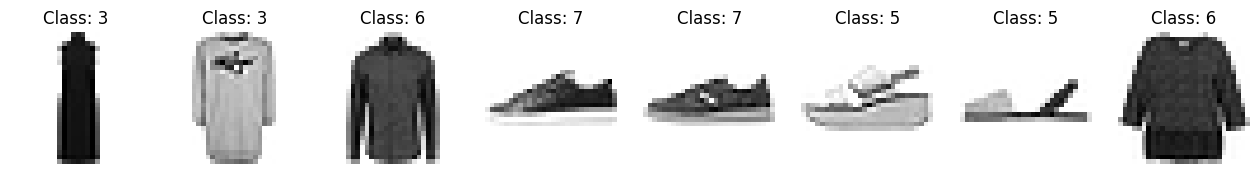

In [12]:
for (X_train, y_train) in train_loader:
    plt.figure(figsize=(plt_images * plt_size, plt_size))

    for i in range(plt_images):
        plt.subplot(1, plt_images, i + 1)
        plt.axis('off')
        plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap="gray_r")
        plt.title(f'Class: {y_train[i].item()}')

    break